In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

# Configuration
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print("✅ Imports effectués")

✅ Imports effectués


In [2]:
# Chemins des données
import os
from pathlib import Path

def find_data_dir():
    """Recherche robuste du dossier de données en utilisant Path.resolve()."""
    cwd = Path.cwd().resolve()
    # Candidats courants relatifs à l'emplacement du notebook/workspace
    candidates = [
        cwd / "data",
        cwd.parent / "data",
        cwd.parent.parent / "data",
    ]
    for c in candidates:
        if c.exists():
            return c.resolve()

    # Dossier projet alternatif (nom présent dans ce workspace)
    alt = cwd.parent / "Projet+Mise+en+prod+-+home-credit-default-risk"
    if alt.exists():
        return alt.resolve()

    # Rechercher récursivement vers le haut un fichier connu (application_train.csv)
    for p in [cwd, *cwd.parents]:
        matches = list(p.rglob("application_train.csv"))
        if matches:
            return matches[0].parent.resolve()

    # Vérifier la variable d'environnement DATA_DIR en dernier recours
    env = os.getenv("DATA_DIR")
    if env:
        p = Path(env).expanduser().resolve()
        if p.exists():
            return p

    raise FileNotFoundError("Dataset introuvable. Placez les CSVs dans un dossier 'data' ou définissez la variable d'environnement DATA_DIR.")

# Obtenir DATA_DIR (avec fallback explicite)
try:
    DATA_DIR = find_data_dir()
except FileNotFoundError as e:
    print(str(e))
    DATA_DIR = Path("../data").resolve()
    print(f"⚠️ Utilisation du chemin par défaut: {DATA_DIR}")
else:
    print(f"📁 Dossier des données (résolu): {DATA_DIR}")

print(f"📄 Fichiers disponibles:")
for f in DATA_DIR.glob("*.csv"):
    size_mb = f.stat().st_size / (1024 * 1024)
    print(f"   - {f.name} ({size_mb:.1f} MB)")

📁 Dossier des données (résolu): /Users/jeffreylepage/Desktop/OPENCLASSROOMS/Lepage_Jeffrey_Réalisez_un_dashboard_et_assurez_une_veille_technique/home-credit-scoring/data
📄 Fichiers disponibles:
   - application_test.csv (25.3 MB)
   - HomeCredit_columns_description.csv (0.0 MB)
   - POS_CASH_balance.csv (374.5 MB)
   - credit_card_balance.csv (404.9 MB)
   - installments_payments.csv (689.6 MB)
   - application_train.csv (158.4 MB)
   - bureau.csv (162.1 MB)
   - previous_application.csv (386.2 MB)
   - bureau_balance.csv (358.2 MB)
   - sample_submission.csv (0.5 MB)


## 1. Chargement des données principales

In [3]:
# Charger les données d'application
train = pd.read_csv(DATA_DIR / "application_train.csv")
test = pd.read_csv(DATA_DIR / "application_test.csv")

print(f"📊 application_train: {train.shape[0]:,} lignes, {train.shape[1]} colonnes")
print(f"📊 application_test: {test.shape[0]:,} lignes, {test.shape[1]} colonnes")

📊 application_train: 307,511 lignes, 122 colonnes
📊 application_test: 48,744 lignes, 121 colonnes


In [4]:
# Aperçu des premières lignes
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [5]:
# Types de données
print("\n📋 Types de données:")
print(train.dtypes.value_counts())


📋 Types de données:
float64    65
int64      41
object     16
Name: count, dtype: int64


## 2. Analyse de la Variable Cible (TARGET)

In [6]:
# Distribution de la target
target_counts = train['TARGET'].value_counts()
target_pct = train['TARGET'].value_counts(normalize=True) * 100

print("📊 Distribution de la TARGET:")
print(f"   0 (Pas de défaut): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"   1 (Défaut): {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\n⚠️ Classes déséquilibrées: ratio {target_counts[0]/target_counts[1]:.1f}:1")

📊 Distribution de la TARGET:
   0 (Pas de défaut): 282,686 (91.93%)
   1 (Défaut): 24,825 (8.07%)

⚠️ Classes déséquilibrées: ratio 11.4:1


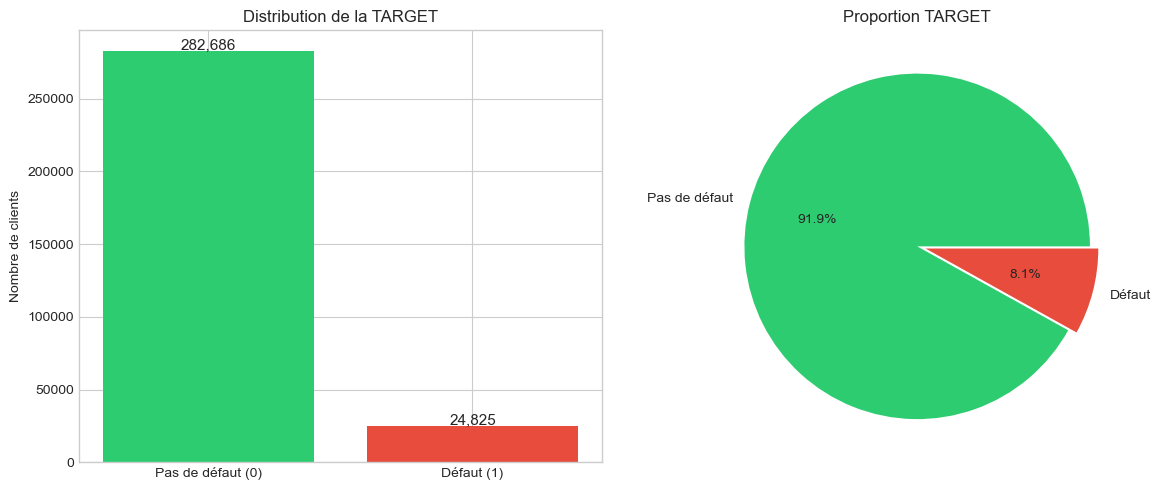

In [7]:
# Visualisation de la target
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
colors = ['#2ecc71', '#e74c3c']
ax1 = axes[0]
bars = ax1.bar(['Pas de défaut (0)', 'Défaut (1)'], target_counts.values, color=colors)
ax1.set_ylabel('Nombre de clients')
ax1.set_title('Distribution de la TARGET')
for bar, count in zip(bars, target_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             f'{count:,}', ha='center', fontsize=11)

# Pie chart
ax2 = axes[1]
ax2.pie(target_counts.values, labels=['Pas de défaut', 'Défaut'],
        autopct='%1.1f%%', colors=colors, explode=[0, 0.05])
ax2.set_title('Proportion TARGET')

plt.tight_layout()
plt.savefig('../reports/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Analyse des Valeurs Manquantes

In [8]:
# Calculer le % de valeurs manquantes
missing = train.isnull().sum() / len(train) * 100
missing = missing[missing > 0].sort_values(ascending=False)

print(f"📊 {len(missing)} colonnes ont des valeurs manquantes sur {train.shape[1]}")
print(f"\n🔝 Top 20 colonnes avec le plus de valeurs manquantes:")
print(missing.head(20))

📊 67 colonnes ont des valeurs manquantes sur 122

🔝 Top 20 colonnes avec le plus de valeurs manquantes:
COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_AVG        68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
FLOORSMIN_AVG               67.848630
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_AVG                59.376738
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
dtype: float64


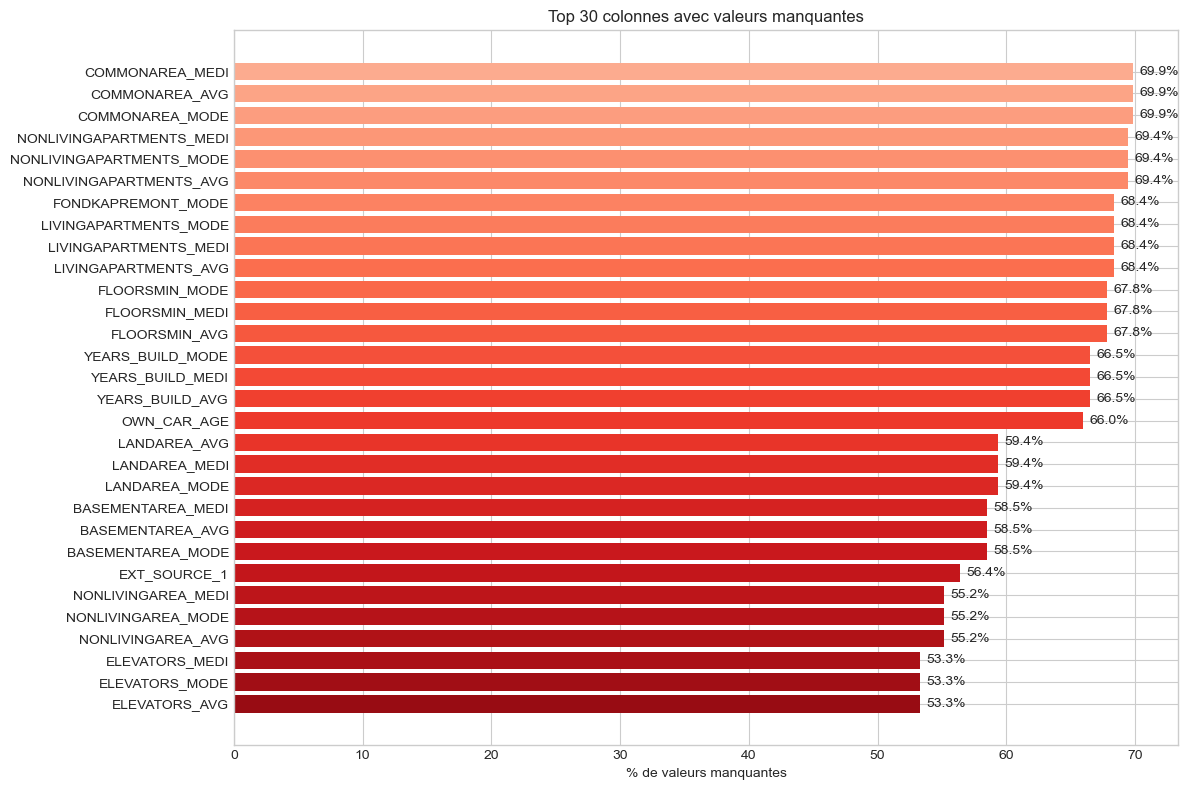

In [9]:
# Visualisation des valeurs manquantes
fig, ax = plt.subplots(figsize=(12, 8))

missing_top = missing.head(30)
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(missing_top)))

ax.barh(range(len(missing_top)), missing_top.values, color=colors)
ax.set_yticks(range(len(missing_top)))
ax.set_yticklabels(missing_top.index)
ax.invert_yaxis()
ax.set_xlabel('% de valeurs manquantes')
ax.set_title('Top 30 colonnes avec valeurs manquantes')

# Ajouter les pourcentages
for i, v in enumerate(missing_top.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.savefig('../reports/missing_values.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Analyse des Variables Numériques

In [10]:
# Variables numériques importantes
num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
            'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
            'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

train[num_cols].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.502130,5.143927e-01,0.510853
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,3522.886321,1509.450419,0.211062,1.910602e-01,0.194844
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.014568,8.173617e-08,0.000527
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000,0.334007,3.924574e-01,0.370650
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,0.505998,5.659614e-01,0.535276
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,0.675053,6.636171e-01,0.669057
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,0.962693,8.549997e-01,0.896010


In [11]:
# Créer des features dérivées pour l'analyse
train_analysis = train.copy()
train_analysis['AGE_YEARS'] = -train_analysis['DAYS_BIRTH'] / 365
train_analysis['EMPLOYED_YEARS'] = -train_analysis['DAYS_EMPLOYED'] / 365
train_analysis['EMPLOYED_YEARS'] = train_analysis['EMPLOYED_YEARS'].replace(1000.67, np.nan)

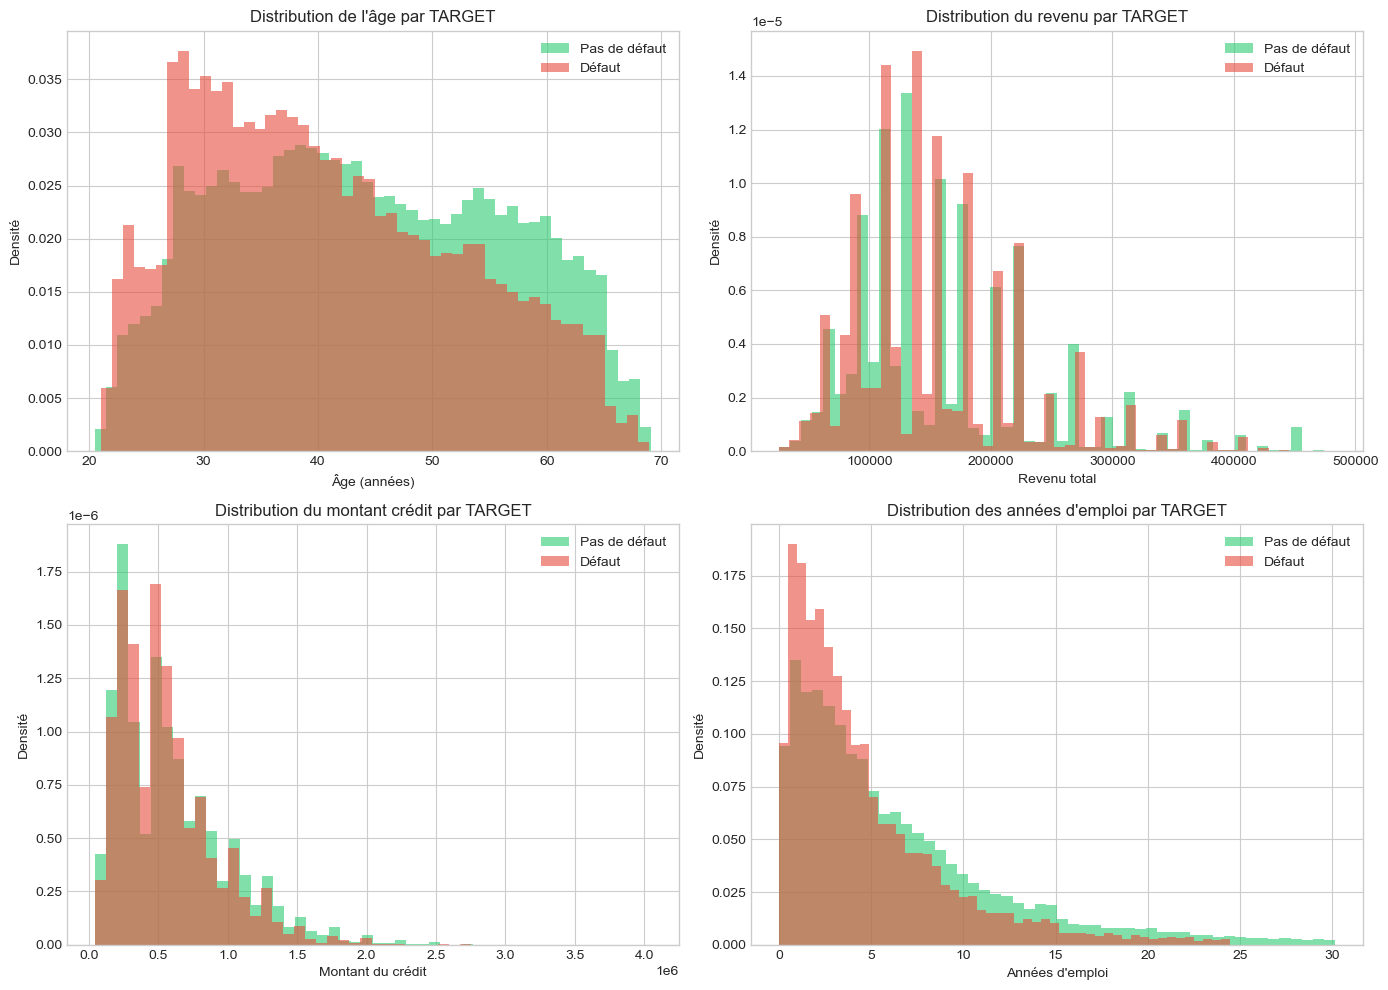

In [12]:
# Distribution de l'âge par TARGET
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Âge
ax1 = axes[0, 0]
for target in [0, 1]:
    data = train_analysis[train_analysis['TARGET'] == target]['AGE_YEARS']
    label = 'Pas de défaut' if target == 0 else 'Défaut'
    color = '#2ecc71' if target == 0 else '#e74c3c'
    ax1.hist(data, bins=50, alpha=0.6, label=label, color=color, density=True)
ax1.set_xlabel('Âge (années)')
ax1.set_ylabel('Densité')
ax1.set_title('Distribution de l\'âge par TARGET')
ax1.legend()

# Revenu
ax2 = axes[0, 1]
for target in [0, 1]:
    data = train_analysis[train_analysis['TARGET'] == target]['AMT_INCOME_TOTAL']
    data = data[data < data.quantile(0.99)]  # Exclure outliers
    label = 'Pas de défaut' if target == 0 else 'Défaut'
    color = '#2ecc71' if target == 0 else '#e74c3c'
    ax2.hist(data, bins=50, alpha=0.6, label=label, color=color, density=True)
ax2.set_xlabel('Revenu total')
ax2.set_ylabel('Densité')
ax2.set_title('Distribution du revenu par TARGET')
ax2.legend()

# Montant du crédit
ax3 = axes[1, 0]
for target in [0, 1]:
    data = train_analysis[train_analysis['TARGET'] == target]['AMT_CREDIT']
    label = 'Pas de défaut' if target == 0 else 'Défaut'
    color = '#2ecc71' if target == 0 else '#e74c3c'
    ax3.hist(data, bins=50, alpha=0.6, label=label, color=color, density=True)
ax3.set_xlabel('Montant du crédit')
ax3.set_ylabel('Densité')
ax3.set_title('Distribution du montant crédit par TARGET')
ax3.legend()

# Années d'emploi
ax4 = axes[1, 1]
for target in [0, 1]:
    data = train_analysis[train_analysis['TARGET'] == target]['EMPLOYED_YEARS'].dropna()
    data = data[(data > 0) & (data < data.quantile(0.99))]
    label = 'Pas de défaut' if target == 0 else 'Défaut'
    color = '#2ecc71' if target == 0 else '#e74c3c'
    ax4.hist(data, bins=50, alpha=0.6, label=label, color=color, density=True)
ax4.set_xlabel('Années d\'emploi')
ax4.set_ylabel('Densité')
ax4.set_title('Distribution des années d\'emploi par TARGET')
ax4.legend()

plt.tight_layout()
plt.savefig('../reports/numeric_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Analyse des Sources Externes (EXT_SOURCE)

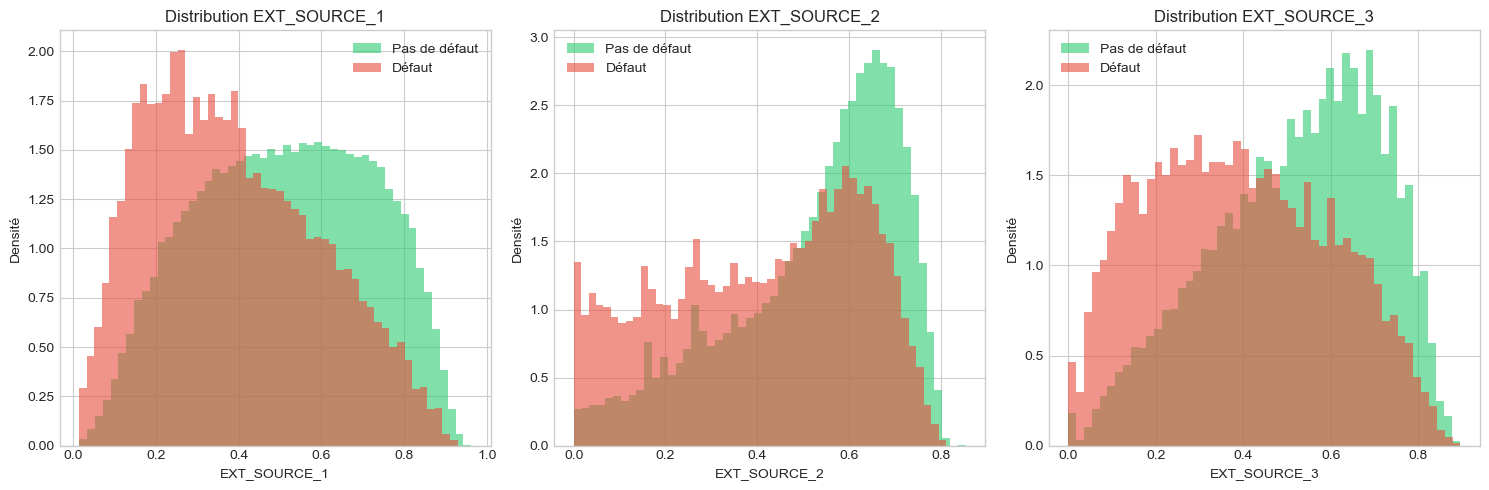

In [13]:
# Les scores externes sont très prédictifs
ext_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(ext_cols):
    ax = axes[i]
    for target in [0, 1]:
        data = train_analysis[train_analysis['TARGET'] == target][col].dropna()
        label = 'Pas de défaut' if target == 0 else 'Défaut'
        color = '#2ecc71' if target == 0 else '#e74c3c'
        ax.hist(data, bins=50, alpha=0.6, label=label, color=color, density=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Densité')
    ax.set_title(f'Distribution {col}')
    ax.legend()

plt.tight_layout()
plt.savefig('../reports/ext_source_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

In [14]:
# Corrélation entre EXT_SOURCE et TARGET
print("📊 Corrélation avec TARGET:")
for col in ext_cols:
    corr = train[[col, 'TARGET']].corr().iloc[0, 1]
    print(f"   {col}: {corr:.4f}")

📊 Corrélation avec TARGET:
   EXT_SOURCE_1: -0.1553
   EXT_SOURCE_2: -0.1605
   EXT_SOURCE_3: -0.1789


## 6. Analyse des Variables Catégorielles

In [15]:
# Variables catégorielles
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
print(f"📊 {len(cat_cols)} variables catégorielles:")
for col in cat_cols:
    n_unique = train[col].nunique()
    print(f"   - {col}: {n_unique} catégories")

📊 16 variables catégorielles:
   - NAME_CONTRACT_TYPE: 2 catégories
   - CODE_GENDER: 3 catégories
   - FLAG_OWN_CAR: 2 catégories
   - FLAG_OWN_REALTY: 2 catégories
   - NAME_TYPE_SUITE: 7 catégories
   - NAME_INCOME_TYPE: 8 catégories
   - NAME_EDUCATION_TYPE: 5 catégories
   - NAME_FAMILY_STATUS: 6 catégories
   - NAME_HOUSING_TYPE: 6 catégories
   - OCCUPATION_TYPE: 18 catégories
   - WEEKDAY_APPR_PROCESS_START: 7 catégories
   - ORGANIZATION_TYPE: 58 catégories
   - FONDKAPREMONT_MODE: 4 catégories
   - HOUSETYPE_MODE: 3 catégories
   - WALLSMATERIAL_MODE: 7 catégories
   - EMERGENCYSTATE_MODE: 2 catégories
   - WALLSMATERIAL_MODE: 7 catégories
   - EMERGENCYSTATE_MODE: 2 catégories


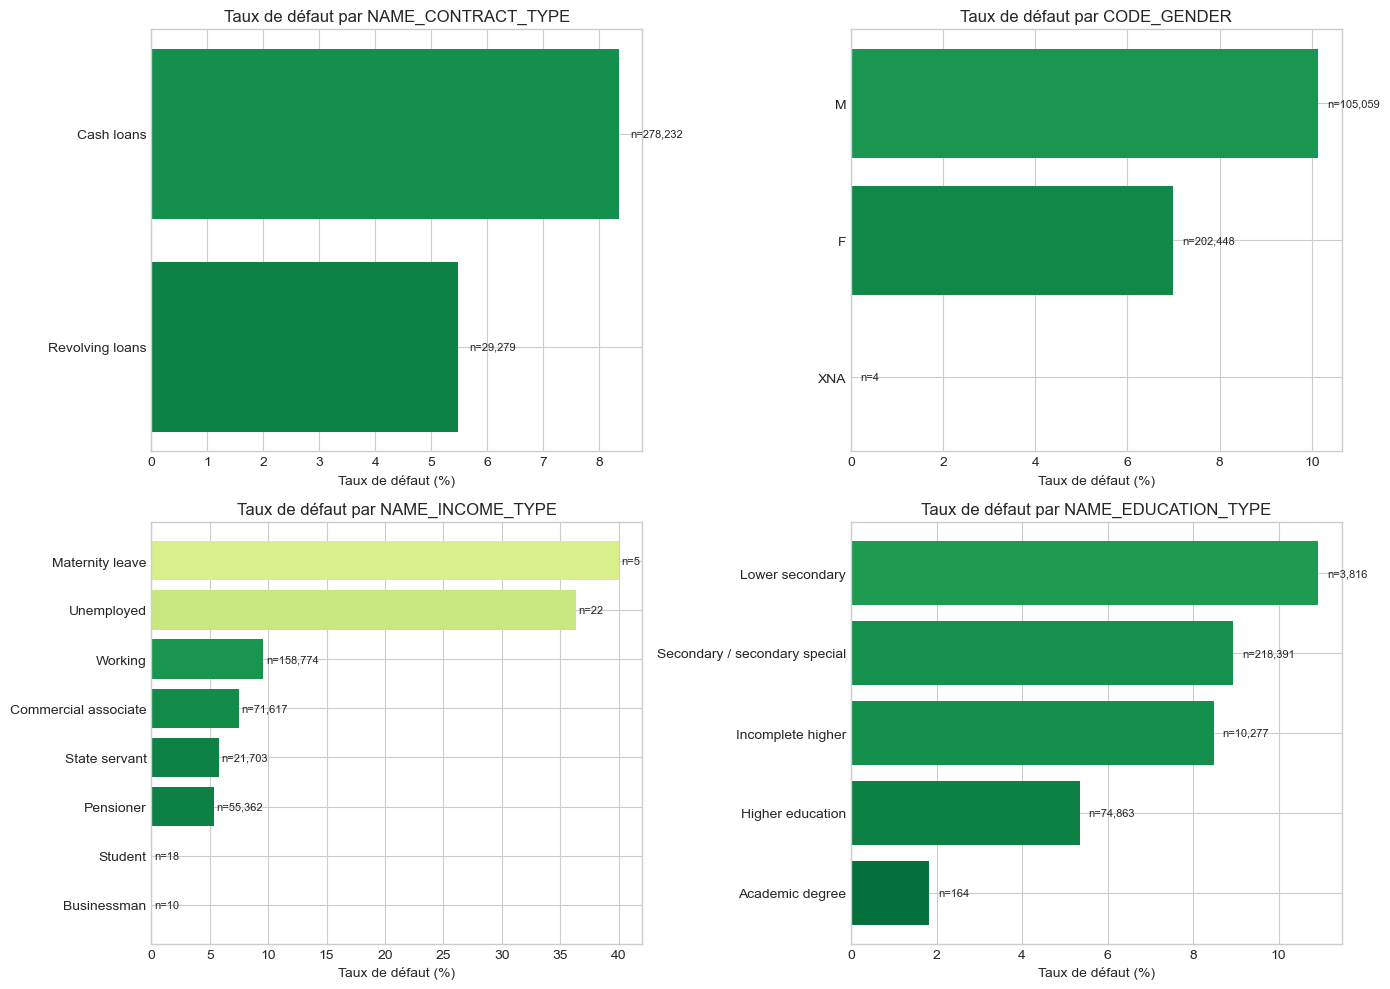

In [16]:
# Taux de défaut par catégorie pour les principales variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

cat_to_plot = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

for i, col in enumerate(cat_to_plot):
    ax = axes[i // 2, i % 2]
    
    # Calculer le taux de défaut par catégorie
    default_rate = train.groupby(col)['TARGET'].agg(['mean', 'count'])
    default_rate = default_rate.sort_values('mean', ascending=True)
    
    colors = plt.cm.RdYlGn_r(default_rate['mean'])
    
    bars = ax.barh(range(len(default_rate)), default_rate['mean'] * 100, color=colors)
    ax.set_yticks(range(len(default_rate)))
    ax.set_yticklabels(default_rate.index)
    ax.set_xlabel('Taux de défaut (%)')
    ax.set_title(f'Taux de défaut par {col}')
    
    # Ajouter le nombre de clients
    for j, (bar, count) in enumerate(zip(bars, default_rate['count'])):
        ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
                f'n={count:,}', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('../reports/categorical_default_rates.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Matrice de Corrélation

In [17]:
# Corrélation des principales features numériques avec TARGET
numeric_train = train.select_dtypes(include=[np.number])
correlations = numeric_train.corr()['TARGET'].drop('TARGET').sort_values()

print("📊 Top 15 corrélations positives avec TARGET:")
print(correlations.tail(15))

print("\n📊 Top 15 corrélations négatives avec TARGET:")
print(correlations.head(15))

📊 Top 15 corrélations positives avec TARGET:
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
Name: TARGET, dtype: float64

📊 Top 15 corrélations négatives avec TARGET:
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOO

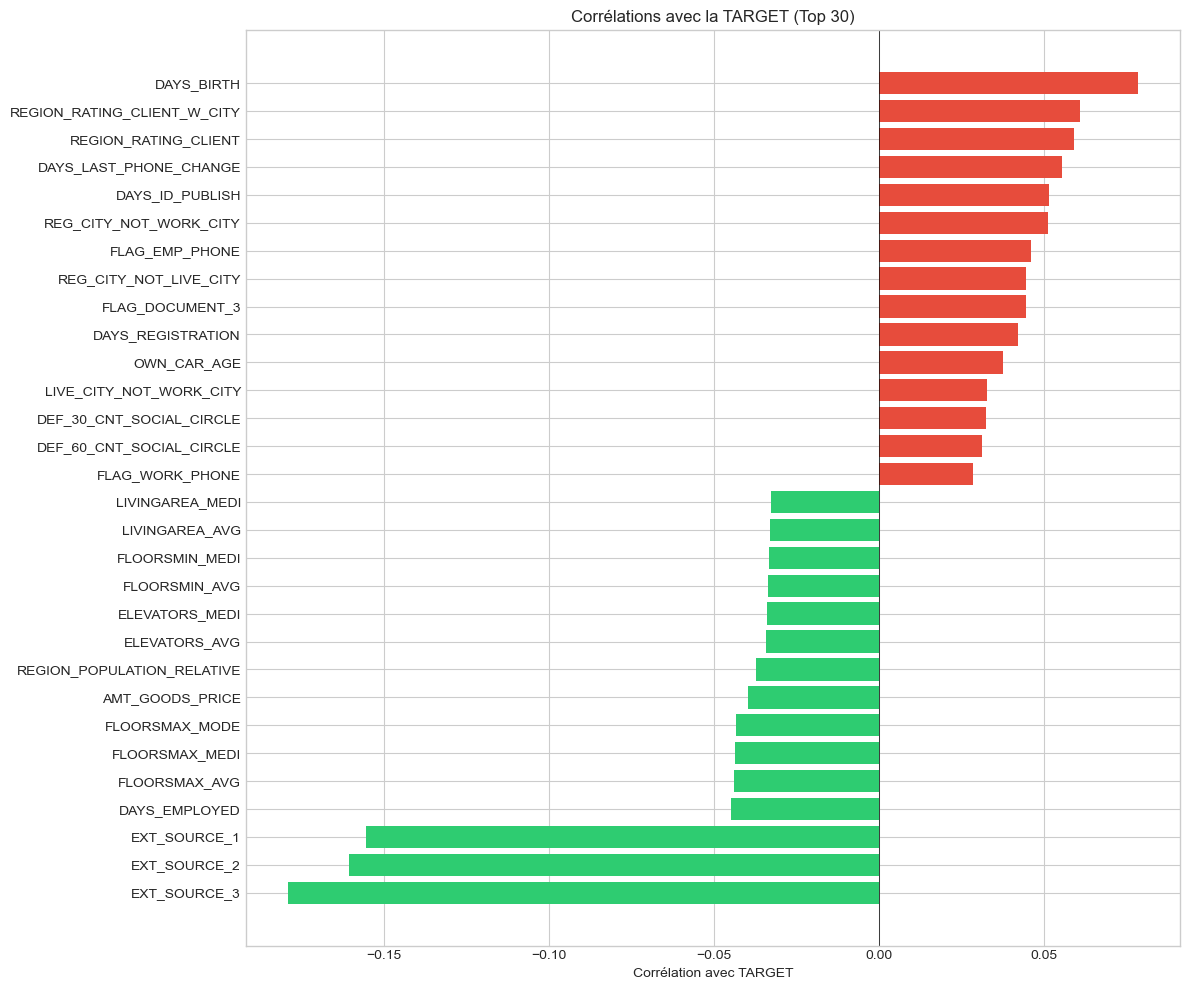

In [18]:
# Visualisation des corrélations
fig, ax = plt.subplots(figsize=(12, 10))

# Top et bottom correlations
top_corr = pd.concat([correlations.head(15), correlations.tail(15)])
colors = ['#e74c3c' if c > 0 else '#2ecc71' for c in top_corr.values]

ax.barh(range(len(top_corr)), top_corr.values, color=colors)
ax.set_yticks(range(len(top_corr)))
ax.set_yticklabels(top_corr.index)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xlabel('Corrélation avec TARGET')
ax.set_title('Corrélations avec la TARGET (Top 30)')

plt.tight_layout()
plt.savefig('../reports/correlations_target.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Aperçu des Tables Supplémentaires

In [19]:
# Charger les autres tables
tables = {
    'bureau': DATA_DIR / 'bureau.csv',
    'bureau_balance': DATA_DIR / 'bureau_balance.csv',
    'previous_application': DATA_DIR / 'previous_application.csv',
    'installments_payments': DATA_DIR / 'installments_payments.csv',
    'POS_CASH_balance': DATA_DIR / 'POS_CASH_balance.csv',
    'credit_card_balance': DATA_DIR / 'credit_card_balance.csv'
}

print("📊 Aperçu des tables supplémentaires:")
for name, path in tables.items():
    if path.exists():
        df = pd.read_csv(path, nrows=1000)  # Charger un échantillon
        full_df = pd.read_csv(path)
        print(f"\n   {name}:")
        print(f"      - Lignes: {len(full_df):,}")
        print(f"      - Colonnes: {len(full_df.columns)}")
        print(f"      - Colonnes: {list(full_df.columns[:5])}...")

📊 Aperçu des tables supplémentaires:

   bureau:
      - Lignes: 1,716,428
      - Colonnes: 17
      - Colonnes: ['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT']...

   bureau_balance:
      - Lignes: 27,299,925
      - Colonnes: 3
      - Colonnes: ['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS']...

   previous_application:
      - Lignes: 1,670,214
      - Colonnes: 37
      - Colonnes: ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION']...

   installments_payments:
      - Lignes: 13,605,401
      - Colonnes: 8
      - Colonnes: ['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT']...

   POS_CASH_balance:
      - Lignes: 10,001,358
      - Colonnes: 8
      - Colonnes: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']...

   credit_card_balance:
      - Lignes: 3,840,312
      - Colonnes: 23
      - Colonnes: ['SK_ID_PREV', 'SK_ID_CUR

## 9. Conclusions de l'EDA

### Points clés:

1. **Classes déséquilibrées**: ~8% de défauts seulement → nécessite un traitement spécial

2. **Variables très prédictives**:
   - `EXT_SOURCE_1/2/3`: Scores externes très corrélés avec la target
   - Variables temporelles (âge, ancienneté emploi)
   - Ratios financiers (crédit/revenu)

3. **Valeurs manquantes**: Nombreuses colonnes avec >50% de NaN → stratégie d'imputation nécessaire

4. **Features engineering potentiel**:
   - Ratios financiers (credit/income, annuity/income)
   - Agrégation des tables auxiliaires
   - Combinaison des scores externes

5. **Variables catégorielles**: Plusieurs variables avec impact significatif sur le défaut